Loading Modules

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing

#Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import cm #colormap

Loading Dataset

In [97]:
df_fault_data = pd.read_csv('C:/Users/maryo/Desktop/Data Analysis/Python Codes/Fault Analysis/fault_data.csv')

Data Preparation

In [ ]:
df_fault_data.head()


In [99]:
df_fault_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Fault ID                              506 non-null    object 
 1   Fault Type                            506 non-null    object 
 2   Fault Location (Latitude, Longitude)  506 non-null    object 
 3   Voltage (V)                           506 non-null    int64  
 4   Current (A)                           506 non-null    int64  
 5   Power Load (MW)                       506 non-null    int64  
 6   Temperature (°C)                      506 non-null    int64  
 7   Wind Speed (km/h)                     506 non-null    int64  
 8   Weather Condition                     506 non-null    object 
 9   Maintenance Status                    506 non-null    object 
 10  Component Health                      506 non-null    object 
 11  Duration of Fault (

In [100]:
df_fault_data.describe()

,Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Duration of Fault (hrs),Down time (hrs)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2049.636364,216.458498,50.011858,30.166008,19.739130,4.008103,3.999802
std,142.054146,21.499787,3.102834,6.118315,5.863052,1.147271,1.842367
min,1800.000000,180.000000,45.000000,20.000000,10.000000,2.000000,1.000000
25%,1923.000000,197.250000,47.000000,25.000000,15.000000,3.000000,2.300000
50%,2058.000000,218.000000,50.000000,30.000000,19.500000,4.000000,4.000000
75%,2165.750000,235.000000,53.000000,36.000000,25.000000,5.000000,5.700000
max,2300.000000,250.000000,55.000000,40.000000,30.000000,6.000000,7.000000


In [101]:
print(df_fault_data.duplicated().sum())

0


Data Cleaning

In [ ]:
#Standardize Column Names
df_fault_data.columns = df_fault_data.columns.str.lower().str.replace(' ', '_')
df_fault_data['weather_condition'] = df_fault_data['weather_condition'].str.strip()
df_fault_data['maintenance_status'] = df_fault_data['maintenance_status'].str.strip()
df_fault_data['component_health'] = df_fault_data['component_health'].str.strip()

#Standardize Formatting Type
df_fault_data['fault_id'] = df_fault_data['fault_id'].astype('string')
df_fault_data['fault_type'] = df_fault_data['fault_type'].astype('string')
df_fault_data['fault_location_(latitude,_longitude)'] = df_fault_data['fault_location_(latitude,_longitude)'].astype('string')
df_fault_data['weather_condition'] = df_fault_data['weather_condition'].astype('string')
df_fault_data['maintenance_status'] = df_fault_data['maintenance_status'].astype('string')
df_fault_data['component_health'] = df_fault_data['component_health'].astype('string')


display(df_fault_data.head())


In [127]:
# Check for duplicates in the 'Fault ID' column
duplicates = df_fault_data[df_fault_data.duplicated('fault_id', keep=False)]

# Display the duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate Fault IDs found:")
    print(duplicates[['fault_id', 'fault_type', 'down_time_(hrs)']])
else:
    print("No duplicate Fault IDs found.")

No duplicate Fault IDs found.


Dealing with Outliers

In [104]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to clean
numerical_cols = ['voltage_(v)', 'current_(a)', 'power_load_(mw)', 'temperature_(°c)', 'wind_speed_(km/h)']


# Apply outlier removal
for col in numerical_cols:
    if col in df_fault_data.columns:
        df_fault_data = remove_outliers(df_fault_data, col)
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")


# Check final shape
print(f"Dataset after outlier removal: {df_fault_data.shape}")
display(df_fault_data.head())
df_fault_data.head()

Dataset after outlier removal: (506, 13)


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


Data Analysis

. Identify the most common fault types

. Check if higher temperatures lead to increased load/failures

. See if high wind speeds during storms increase faults

. Maintenance status impact on downtime

. Identify the most severe faults requiring long recovery times

. Identify peak failure times to improve response planning

. Fault Duration Prediction Model



**Identify the most common fault types**

In [105]:
# Count occurrences of each fault type
fault_counts = df_fault_data['fault_type'].value_counts()

# Display the most common fault types
display(fault_counts)
df_fault_data.head()

fault_type
Transformer Failure    171
Overheating            171
Line Breakage          164
Name: count, dtype: Int64

,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


Visualizing the Output in a Bar Chart

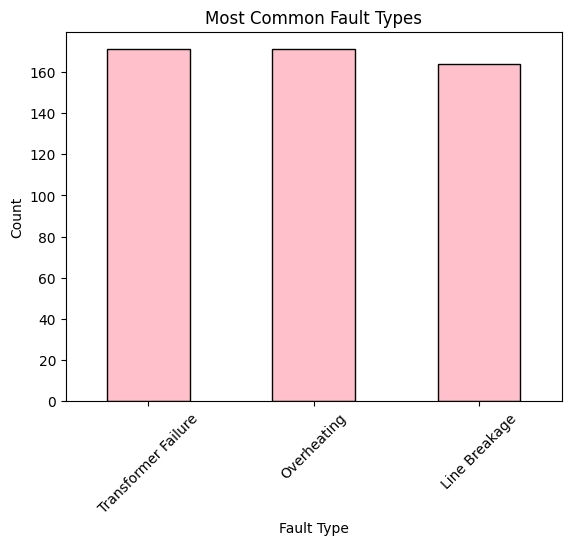

In [106]:
# Plot a bar chart of fault types
fault_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Most Common Fault Types")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Check if higher temperatures lead to increased load/failures**

In [107]:

# Compute correlation
correlation = df_fault_data[['temperature_(°c)', 'power_load_(mw)']].corr()

# Display correlation value
print("Correlation between Temperature and Power Load:")
print(correlation)

Correlation between Temperature and Power Load:
                  temperature_(°c)  power_load_(mw)
temperature_(°c)          1.000000         0.088662
power_load_(mw)           0.088662         1.000000


Visualizing Faults at Different Temperatures

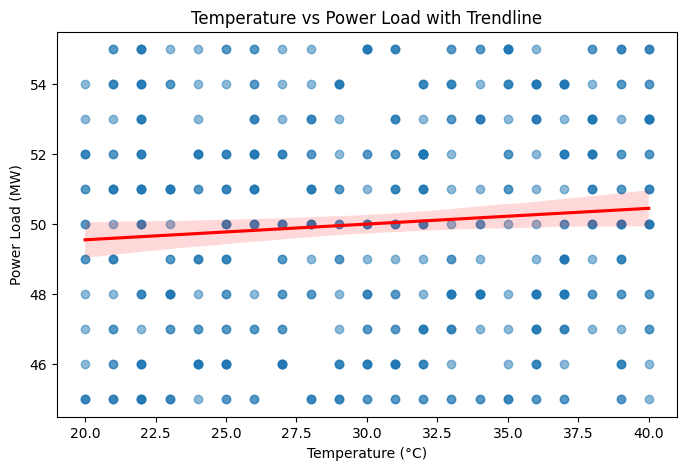

In [108]:

plt.figure(figsize=(8, 5))
sns.regplot(x=df_fault_data['temperature_(°c)'], y=df_fault_data['power_load_(mw)'], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

plt.xlabel("Temperature (°C)")
plt.ylabel("Power Load (MW)")
plt.title("Temperature vs Power Load with Trendline")
plt.show()

**See if high wind speeds during storms increase faults**

In [109]:

# Define stormy weather conditions
storm_conditions = ['Windstorm', 'Thunderstorm', 'Heavy Rain', 'Snowstorm']

# Create a new column to classify stormy vs. non-stormy weather
df_fault_data['Stormy'] = df_fault_data['weather_condition'].isin(storm_conditions)

# Group fault counts by wind speed and stormy condition
fault_counts = df_fault_data.groupby(['wind_speed_(km/h)', 'Stormy'])['fault_id'].count().unstack()

# Fill NaN values with 0
fault_counts = fault_counts.fillna(0)

# Display the grouped fault counts
fault_counts



Stormy,False,True
wind_speed_(km/h),,
10,14,9
11,11,9
12,9,4
13,23,14
14,25,4
15,23,8
16,13,12
17,16,5
18,17,14


Visualization

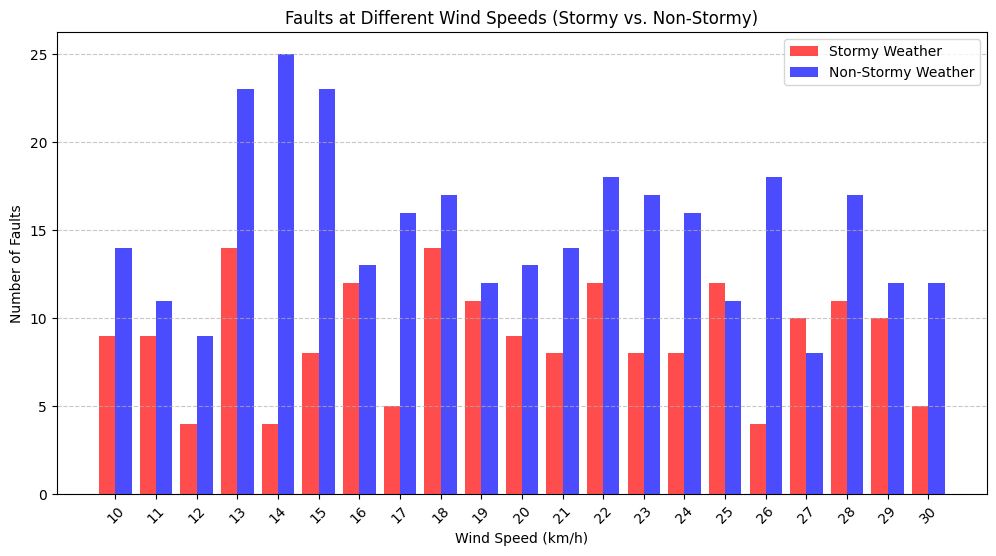

In [110]:


# Extract data for plotting
wind_speeds = fault_counts.index
stormy_faults = fault_counts[True]
non_stormy_faults = fault_counts[False]

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(wind_speeds))

# Create clustered bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, stormy_faults, bar_width, label='Stormy Weather', color='red', alpha=0.7)
plt.bar(x + bar_width/2, non_stormy_faults, bar_width, label='Non-Stormy Weather', color='blue', alpha=0.7)

# Formatting the plot
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Number of Faults")
plt.title("Faults at Different Wind Speeds (Stormy vs. Non-Stormy)")
plt.xticks(ticks=x, labels=wind_speeds, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [111]:
# Convert 'Fault ID' count to numeric for correlation calculation
df_fault_data['fault_count'] = df_fault_data.groupby('wind_speed_(km/h)')['fault_id'].transform('count')

# Compute correlation between wind speed and number of faults
correlation = df_fault_data[['wind_speed_(km/h)', 'fault_count']].corr()

# Display correlation result
correlation


,wind_speed_(km/h),fault_count
wind_speed_(km/h),1.000000,-0.300883
fault_count,-0.300883,1.000000


**Maintenance status impact on downtime**

C:\Users\maryo\AppData\Local\Temp\ipykernel_20436\3454559636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=maintenance_downtime.index, y=maintenance_downtime.values, palette="coolwarm")


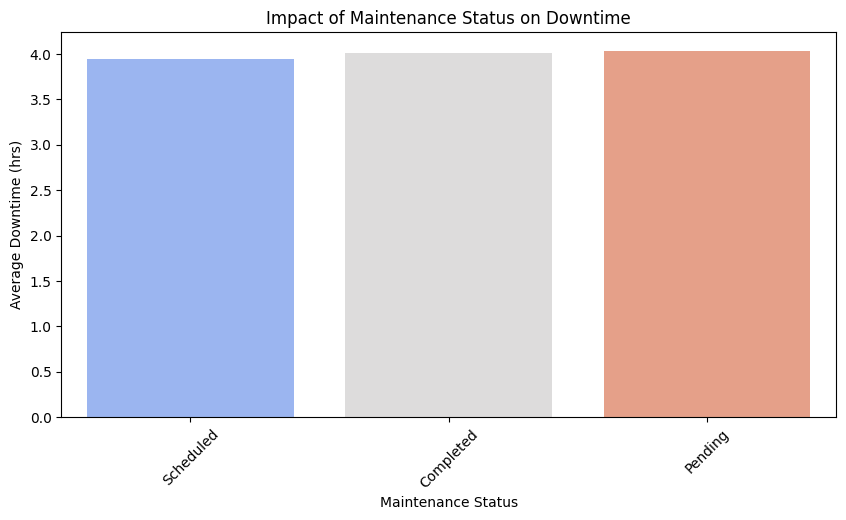

In [114]:

# Group by maintenance status and calculate average downtime
df_fault_data.head()
# Group by maintenance status and calculate average downtime
maintenance_downtime = df_fault_data.groupby("maintenance_status")["down_time_(hrs)"].mean().sort_values()

# Plot average downtime by maintenance status
plt.figure(figsize=(10, 5))
sns.barplot(x=maintenance_downtime.index, y=maintenance_downtime.values, palette="coolwarm")
plt.xlabel("Maintenance Status")
plt.ylabel("Average Downtime (hrs)")
plt.title("Impact of Maintenance Status on Downtime")
plt.xticks(rotation=45)
plt.show()



In [ ]:
from scipy.stats import f_oneway, kruskal

df_fault_data.info()

# Extract downtime values for each maintenance status
groups = [df_fault_data[df_fault_data["maintenance_status"] == status]["down_time_(hrs)"].dropna() for status in df_fault_data["maintenance_status"].unique()]

# Perform ANOVA if data is normally distributed, otherwise use Kruskal-Wallis test
anova_result = f_oneway(*groups)
kruskal_result = kruskal(*groups)

anova_result, kruskal_result


**Identify the most severe faults requiring long recovery times**

In [124]:
# Sort the dataset by 'Down time (hrs)' in descending order
df_sorted = df_fault_data.sort_values(by='down_time_(hrs)', ascending=False)

# Get the top 10 most severe faults
top_10_severe_faults = df_sorted.head(10)

# Display the top 10 most severe faults
print("Top 10 Most Severe Faults Requiring Long Recovery Times:")
print(top_10_severe_faults[['fault_id', 'fault_type', 'down_time_(hrs)']])

Top 10 Most Severe Faults Requiring Long Recovery Times:
    fault_id           fault_type  down_time_(hrs)
42      F043          Overheating              7.0
242     F243          Overheating              7.0
5       F006          Overheating              7.0
204     F205          Overheating              7.0
278     F279  Transformer Failure              7.0
122     F123  Transformer Failure              7.0
51      F052  Transformer Failure              6.9
455     F456        Line Breakage              6.9
306     F307          Overheating              6.9
337     F338        Line Breakage              6.9


C:\Users\maryo\AppData\Local\Temp\ipykernel_20436\1382003260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='down_time_(hrs)', y='fault_id', data=top_10_severe_faults, palette='viridis')


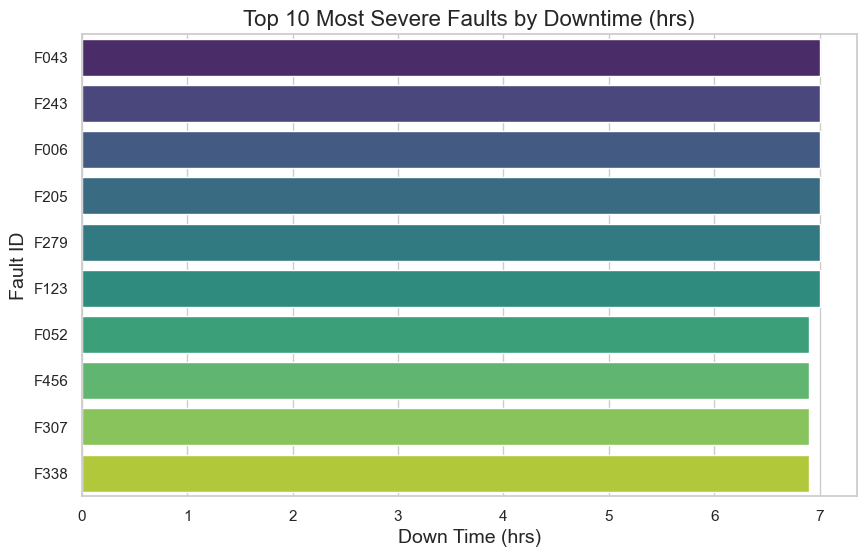

NameError: name 'df' is not defined

<Figure size 1200x600 with 0 Axes>

In [125]:
# Set the style for the plots
sns.set(style="whitegrid")

# Bar Plot: Top 10 Most Severe Faults by Downtime
plt.figure(figsize=(10, 6))
sns.barplot(x='down_time_(hrs)', y='fault_id', data=top_10_severe_faults, palette='viridis')
plt.title('Top 10 Most Severe Faults by Downtime (hrs)', fontsize=16)
plt.xlabel('Down Time (hrs)', fontsize=14)
plt.ylabel('Fault ID', fontsize=14)
plt.show()

# Scatter Plot: Fault Type vs. Downtime
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Down time (hrs)', y='Fault Type', data=df, hue='Fault Type', palette='Set2', s=100)
plt.title('Fault Type vs. Downtime (hrs)', fontsize=16)
plt.xlabel('Down Time (hrs)', fontsize=14)
plt.ylabel('Fault Type', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()